# Exploratory Data Analysis (EDA)

In this notebook, exploratory data analysis (EDA) is performed on the Cleveland Heart Disease dataset.

> Janosi,Andras, Steinbrunn,William, Pfisterer,Matthias, and Detrano,Robert. (1988). Heart Disease. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X.

The goal is to understand the distribution of the target variable and the relationships between different features and the target variable.

## Importing Libraries and Loading the Dataset

After importing the necessary libraries and loading the dataset, missing values will be handled by replacing them with `NaN` and then dropping any rows that contain missing values.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data = pd.read_csv(url, names=column_names)

data.replace('?', np.nan, inplace=True)
data.dropna(inplace=True)
data = data.astype(float)

## Histograms

Visualize the distribution of each feature using histograms

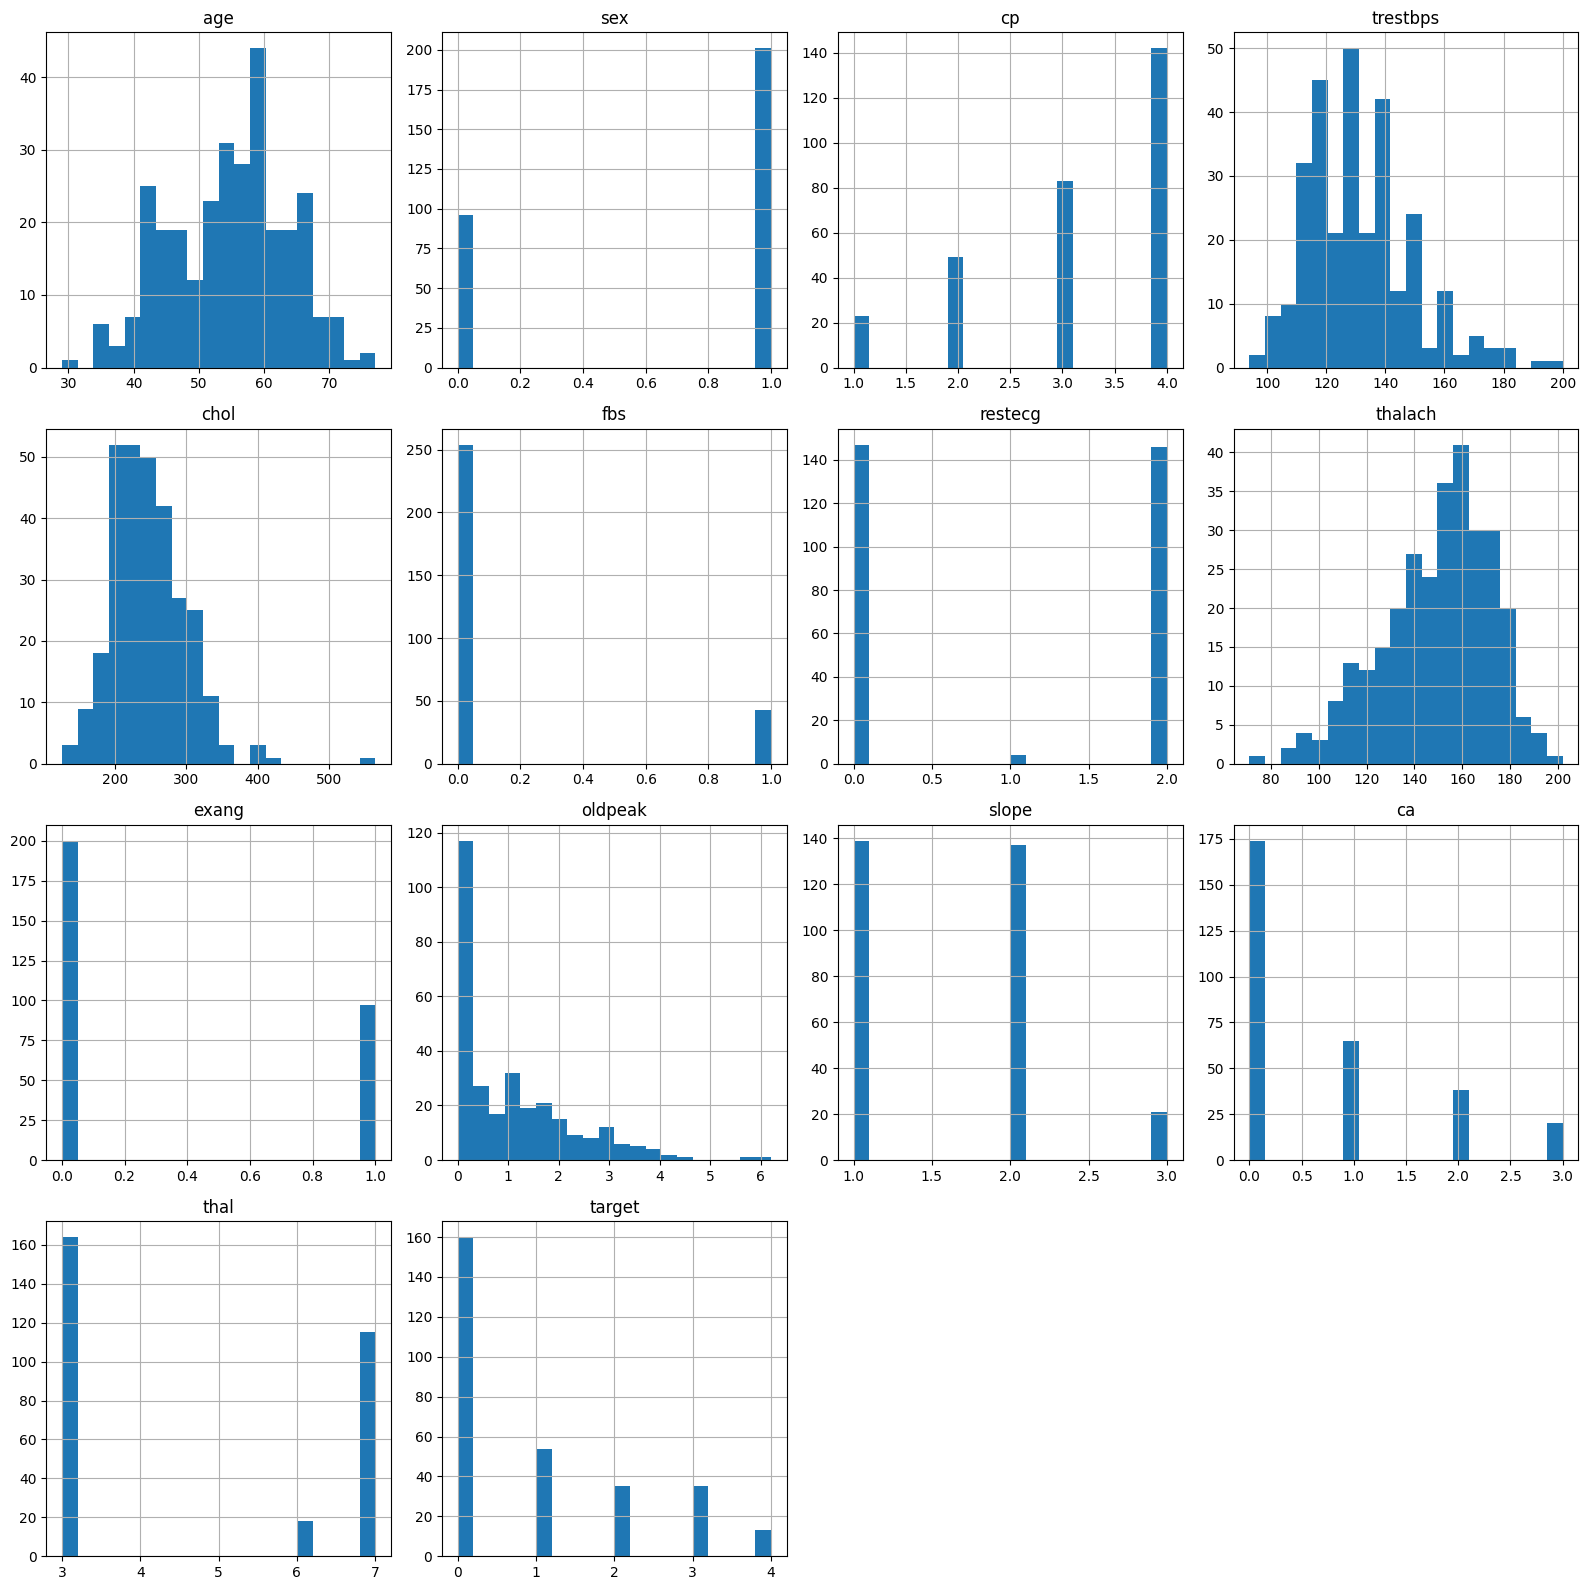

In [12]:
data.hist(figsize=(16, 16), bins=20)
plt.tight_layout()
plt.savefig('./images/feature_histograms.png')
plt.show()

Above it is clear that some features have quasi-normal distributions, others have skew and others are binary or otherwise categorical.

## Target variable

Visualize the target variable distribution

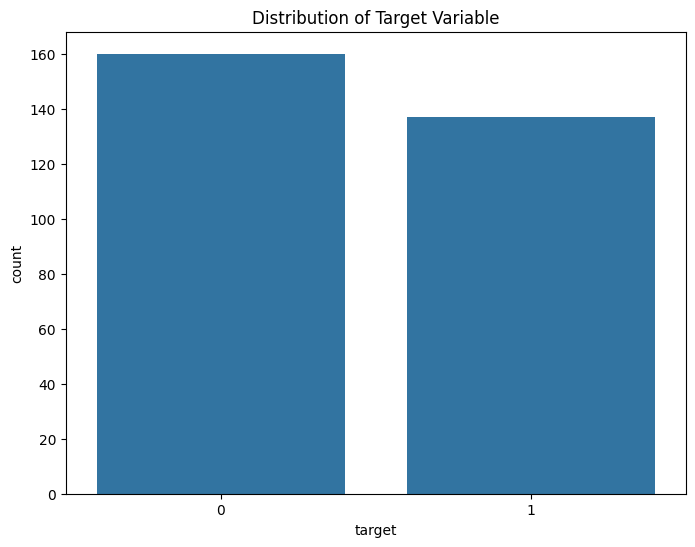

In [13]:
data['target'] = data['target'].apply(lambda x: 1 if x > 0 else 0)

plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=data)
plt.title('Distribution of Target Variable')
plt.savefig('./images/binary_target_distribution.png')
plt.show()

Above, it appears that the target variable is fairly evenly distributed which is a desirable property for many machine learning approaches.

## Correlation Matrix

Generate a correlation matrix to understand any frank linear relationships

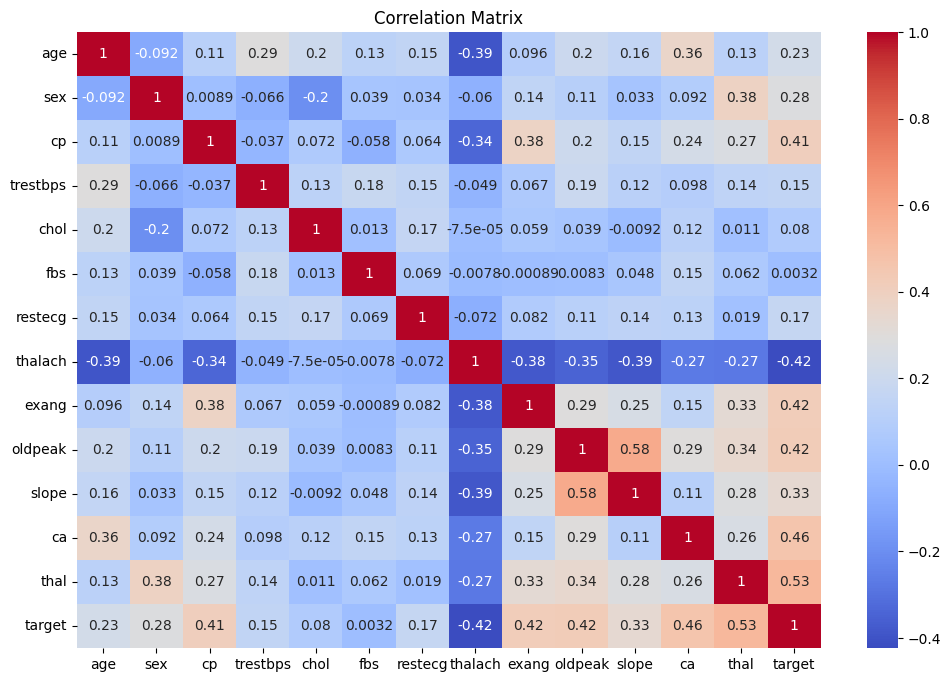

In [14]:
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('./images/correlation_matrix.png')
plt.show()

Above, features cp, exang, oldpeak, slope, ca, and thal show relatively higher correlations with the target variable.

## Pairplot

To assist in the visualization of pairwise relationships, a pairplot is generated.

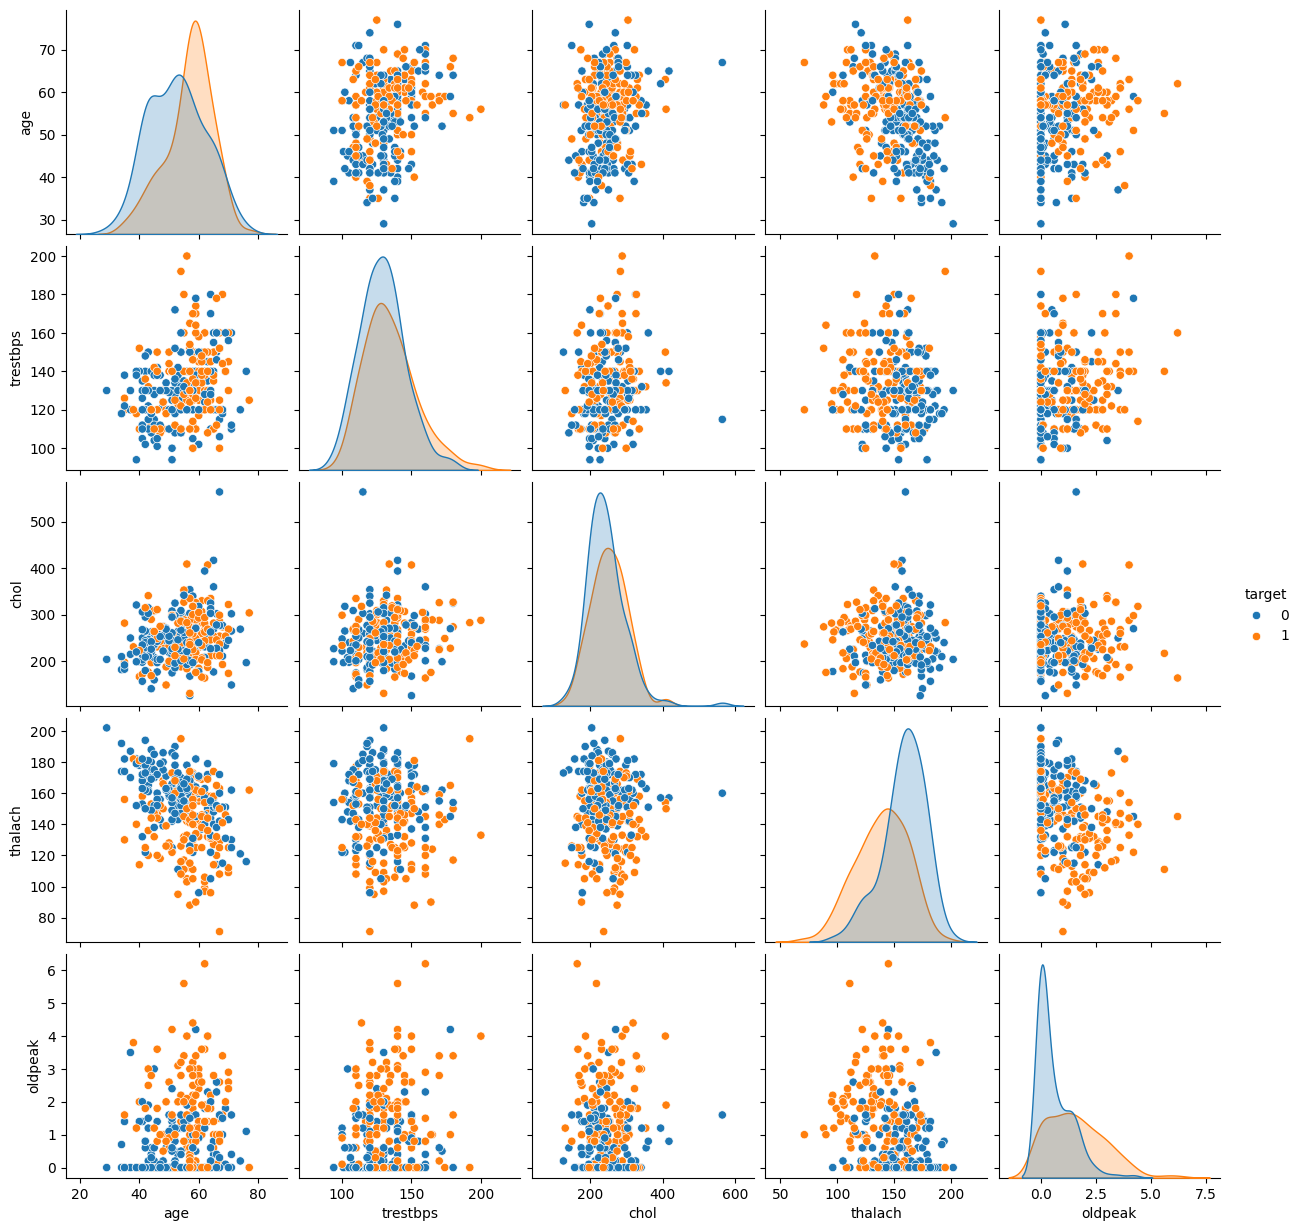

In [15]:
sns.pairplot(data, hue='target', vars=['age', 'trestbps', 'chol', 'thalach', 'oldpeak'])
plt.savefig('./images/pairplot.png')
plt.show()

Above there is clearly overlap in the classes in all cases, but there are clearer separations in some cells, like oldpeak x thalach for example.

## Boxplots

Boxplots can help visualize the distribution of features across the target values.

### Age vs. Target

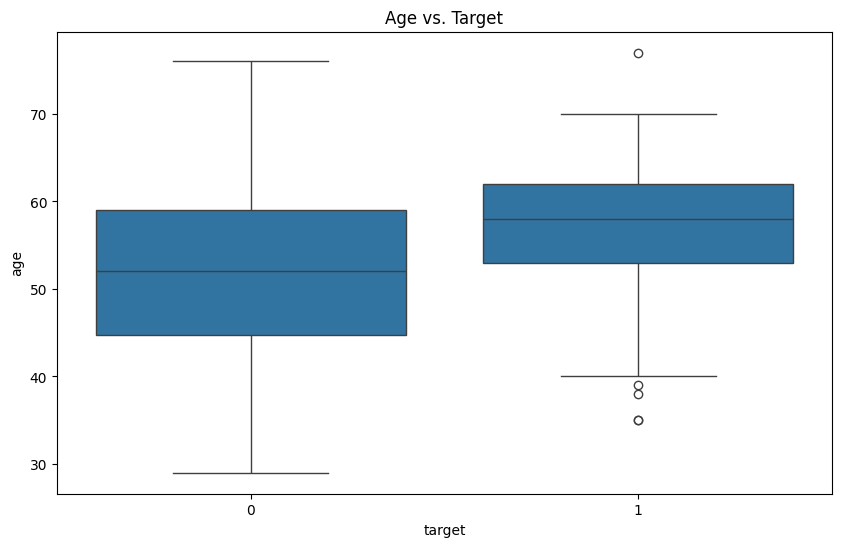

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='age', data=data)
plt.title('Age vs. Target')
plt.savefig('./images/age_vs_target.png')
plt.show()

Above, age appears to be higher in the target group, as might be expected with heart disease.

### Cholesterol vs. Target

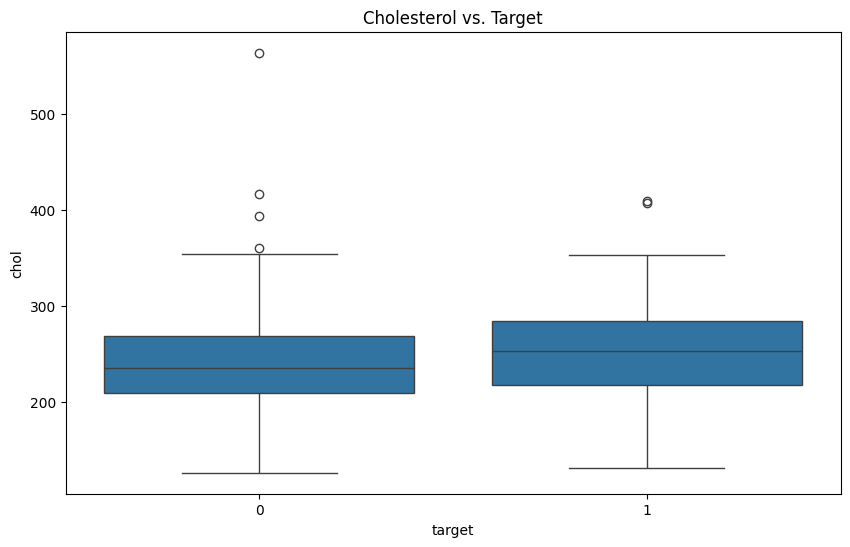

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='chol', data=data)
plt.title('Cholesterol vs. Target')
plt.savefig('./images/chol_vs_target.png')
plt.show()

Above, cholesterol appears slightly higher in the target group.

### Max Heart Rate vs. Target

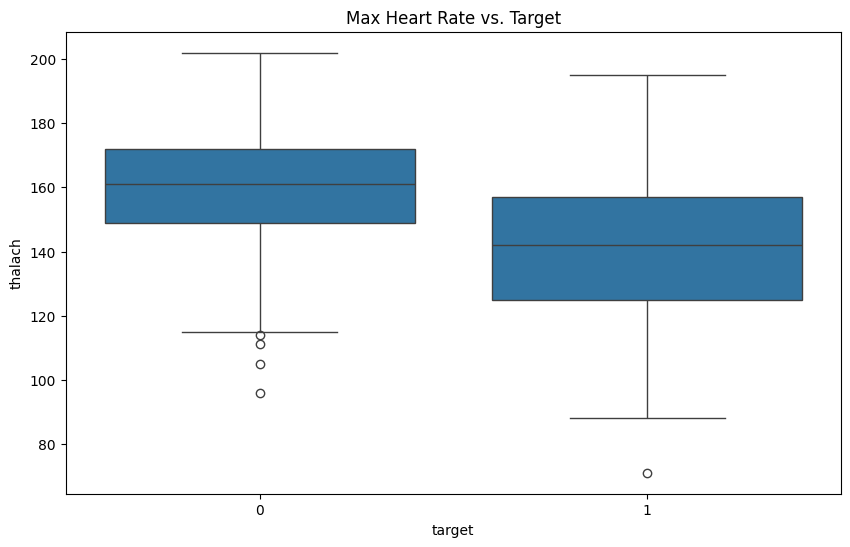

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='thalach', data=data)
plt.title('Max Heart Rate vs. Target')
plt.savefig('./images/thalach_vs_target.png')
plt.show()

Above, maximum heart rate is clearly lower in the target group.